In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 

In [6]:
sim=pd.read_csv('simple_data.csv')
sim.head()

,15,16
0,16.00,18.50
1,17.00,20.20
2,16.40,17.12
3,17.23,18.12
4,43.00,43.00


In [7]:
sim.shape

(14, 2)

In [8]:
sim.describe()

,15,16
count,14.000000,14.000000
mean,57.160929,56.287929
std,35.882725,33.267546
min,16.000000,17.120000
25%,23.672500,25.900000
50%,46.056500,45.756000
75%,99.990000,93.980000
max,102.230000,99.220000


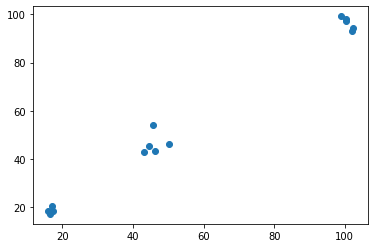

In [9]:
plt.scatter(sim.iloc[:,0],sim.iloc[:,1])

## Fitting K mean to the dataset

In [10]:
from sklearn.cluster import KMeans

In [13]:
x=sim
cluster_id=[]
k=list(range(2,7))
for i in k:
    km=KMeans(i).fit(x)
    y_km=km.fit_predict(x)
    cluster_id.append(km.inertia_)
cluster_id

[3789.2886810222217,
 154.11923299999984,
 76.9253212999999,
 46.35668116666665,
 17.82334833333333]

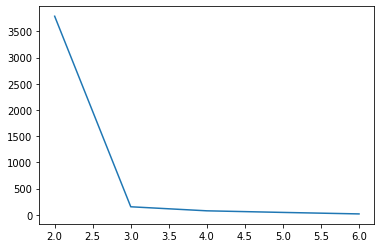

In [15]:
plt.plot(k,cluster_id)
plt.show()

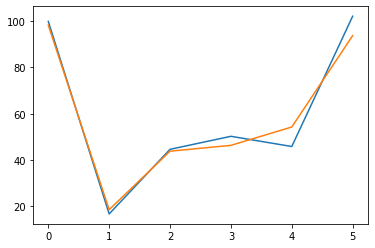

In [25]:
plt.plot(km.cluster_centers_)

In [30]:
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## IRIS

In [31]:
from sklearn.datasets import load_iris

In [41]:
iris=load_iris()

In [35]:
x=iris.data
y=iris.target

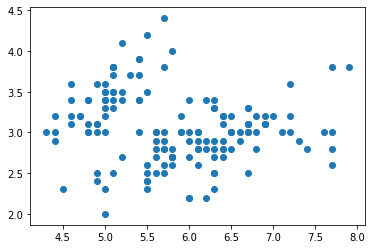

In [38]:
plt.scatter(x[:,0],x[:,1])

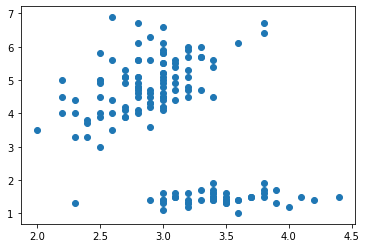

In [39]:
plt.scatter(x[:,1],x[:,2])

In [54]:
iris_inertia=[]
k=list(range(2,7))
for i in k:
    km=KMeans(i).fit(x)
    y_km=km.fit_predict(x)
    iris_inertia.append(km.inertia_)
iris_inertia

[152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.066035353535355]

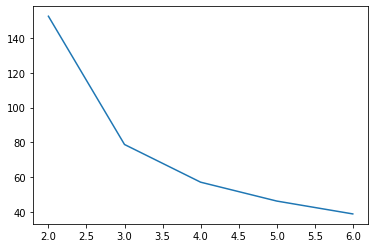

In [55]:
plt.plot(k,iris_inertia)

## fitting k-means to dataset

In [57]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_means=kmeans.fit_predict(x)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [60]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Visualising the cluster

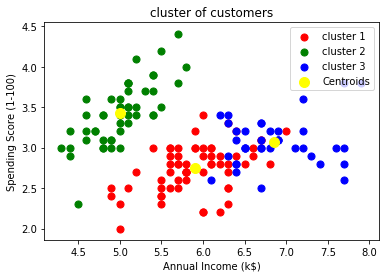

In [65]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='red',label='cluster 1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='green',label='cluster 2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50,c='blue',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='upper right')
plt.show()